# Salus Model



In [ ]:
!pip3 install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 32.8 MB/s 
ERROR: Operation cancelled by user


In [ ]:
import tensorflow as tf
from keras_visualizer import visualizer

ModuleNotFoundError: ignored

In [ ]:
print(tf.__version__)

## Download Dataset

Video specs:
*   Format: mp4
*   Frame count: 75
*   Width: 320
*   Height: 180
*   Frame Rate: 25/s
*   Time: 3 seconds



In [ ]:
import gdown
import zipfile

# gdown.download('https://drive.google.com/uc?export=download&id=1L6ozSfAYmgDochpAK7JP0GDTpjt8rtSZ&confirm=t', './dataset.zip')
# with zipfile.ZipFile('./dataset.zip', 'r') as zip_ref:
#     zip_ref.extractall('.')

gdown.download('https://drive.google.com/uc?export=download&id=1HbT3xNWJi7NWrkdxBZfSLCQqPeh_8_yv&confirm=t', './dataset-kfar-saba-east.zip')
with zipfile.ZipFile('./dataset-kfar-saba-east.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

gdown.download('https://drive.google.com/uc?export=download&id=1D-zLhdLHepoDC42vuS-NJe9a6uEkMuEy&confirm=t', './dataset-rishon.zip')
with zipfile.ZipFile('./dataset-rishon.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

gdown.download('https://drive.google.com/uc?export=download&id=1hvh77JiygSlpIW0HQIhjN9xv1xXqfFfV&confirm=t', './dataset-ganyavne.zip')
with zipfile.ZipFile('./dataset-ganyavne.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

gdown.download('https://drive.google.com/uc?export=download&id=1-96JaH9yXwN-MULs2ObMkX80Efv0YX4n&confirm=t', './55model.h5')
gdown.download('https://drive.google.com/uc?export=download&id=1-GAuwk_QeUEFqAyDgKD2OpWkYtJakGNi&confirm=t', './rishon-model.h5')
gdown.download('https://drive.google.com/uc?export=download&id=1-Fjtl0cIJlUy6PeJzGw598V6tHvqs15L&confirm=t', './gan-yavne-model.h5')


Downloading...
From: https://drive.google.com/uc?export=download&id=1HbT3xNWJi7NWrkdxBZfSLCQqPeh_8_yv&confirm=t
To: /content/dataset-kfar-saba-east.zip
100%|██████████| 175M/175M [00:03<00:00, 45.3MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1D-zLhdLHepoDC42vuS-NJe9a6uEkMuEy&confirm=t
To: /content/dataset-rishon.zip
100%|██████████| 178M/178M [00:04<00:00, 41.3MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1hvh77JiygSlpIW0HQIhjN9xv1xXqfFfV&confirm=t
To: /content/dataset-ganyavne.zip
100%|██████████| 145M/145M [00:04<00:00, 35.6MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1-96JaH9yXwN-MULs2ObMkX80Efv0YX4n&confirm=t
To: /content/55model.h5
100%|██████████| 7.65M/7.65M [00:00<00:00, 21.4MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1-GAuwk_QeUEFqAyDgKD2OpWkYtJakGNi&confirm=t
To: /content/rishon-model.h5
100%|██████████| 7.65M/7.65M [00:00<00:00, 16.1MB/s]
Downloading...
From: h

'./gan-yavne-model.h5'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os

# print(f'Normal video in training count: {len(os.listdir("./dataset-ganyavne/train/normal/"))}')
print(f'Anomaly video in training count: {len(os.listdir("./dataset-kfar-saba-east/train/normal/"))}')

## Preview Videos

In [ ]:
from IPython.display import HTML
from base64 import b64encode

def display_video(path):
    with open(path, 'rb') as mp4_file:
        mp4_data = mp4_file.read()
    data_url = "data:video/mp4;base64," + b64encode(mp4_data).decode()
    return HTML(f'<video width=850 controls muted> <source src="{data_url}" type="video/mp4"> </video>')

### Normal

In [ ]:
display_video('./dataset-kfar-saba-east/train/normal/clip_afternoon_0001.mp4')

### Anomaly

In [ ]:
# display_video('./dataset/train/anomaly/clip_0001.mp4')

## Prepare data for training

In [ ]:
import cv2
import numpy as np

FRAMES_TO_TAKE = [0, 8, 16, 24, 32, 40, 48, 56, 64, 72]
NUMBER_OF_FRAMES = len(FRAMES_TO_TAKE)
NUMBER_OF_FRAMES_TOTAL = 75

def load_video(video_path):
    frames = []
    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    video = np.empty((NUMBER_OF_FRAMES, 176, width, 1), np.dtype('double'))
    taken_frame_index = 0
    for frame_index in range(NUMBER_OF_FRAMES_TOTAL):
        _, frame = cap.read()
        # `[2:178,:]` is to make the frame height 176 because I need it to be divisible by 8
        # `[..., np.newaxis]` is to add more dimension for the grayscale channel (176 X 320 -> 176 X 320 X 1)

        if frame_index in FRAMES_TO_TAKE:
          video[taken_frame_index] = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)[2:178,:][..., np.newaxis] / 255.0 # Added scaling of pixels to [0, 1] range
          taken_frame_index += 1

    cap = cv2.VideoCapture(0) # Trying to release all memory for sure
    cap.release()
    return video

In [ ]:
from tensorflow.keras.utils import Sequence
import math

class VideoSequence(Sequence):
    def __init__(self, files, batch_size):
        self.x = files
        self.batch_size = batch_size

    def __len__(self):
        return math.ceil(len(self.x) / self.batch_size)

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch = np.array([load_video(file_name) for file_name in batch_x])
        return batch, batch

In [ ]:
import glob

BATCH_SIZE = 10

training_set = VideoSequence(glob.glob('./dataset-kfar-saba-east/train/normal/*.mp4'), BATCH_SIZE)
validation_set = VideoSequence(glob.glob('./dataset-kfar-saba-east/validation/normal/*.mp4'), BATCH_SIZE)
test_set = VideoSequence(glob.glob('./dataset-kfar-saba-east/test/*.mp4'), BATCH_SIZE)


print(training_set[0][0].shape)
print(validation_set[0][0].shape)
print(test_set[0][0].shape)

(10, 10, 176, 320, 1)
(10, 10, 176, 320, 1)
(7, 10, 176, 320, 1)


## Model Architecture

In [ ]:
import tensorflow as tf
import keras
from keras.layers import Conv2DTranspose, ConvLSTM2D, BatchNormalization, TimeDistributed, Conv2D, LayerNormalization
from keras.models import Sequential, load_model

def get_model():
    model = Sequential()
    model.add(TimeDistributed(Conv2D(32, (11, 11), strides=4, padding="same"), input_shape=(NUMBER_OF_FRAMES, 176, 320, 1)))
    model.add(LayerNormalization())
    model.add(TimeDistributed(Conv2D(16, (5, 5), strides=2, padding="same")))
    model.add(LayerNormalization())

    model.add(ConvLSTM2D(64, (3, 3), padding="same", return_sequences=True))
    model.add(LayerNormalization())
    model.add(ConvLSTM2D(32, (3, 3), padding="same", return_sequences=True))
    model.add(LayerNormalization())
    model.add(ConvLSTM2D(64, (3, 3), padding="same", return_sequences=True))
    model.add(LayerNormalization())

    model.add(TimeDistributed(Conv2DTranspose(16, (5, 5), strides=2, padding="same")))
    model.add(LayerNormalization())
    model.add(TimeDistributed(Conv2DTranspose(32, (11, 11), strides=4, padding="same")))
    model.add(LayerNormalization())
    model.add(TimeDistributed(Conv2D(1, (11, 11), activation="sigmoid", padding="same")))
    print(model.summary())
    model.compile(loss='mse', optimizer=tf.optimizers.Adam(learning_rate=1e-4, decay=1e-5, epsilon=1e-6))
    return model

In [ ]:
model = get_model()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 10, 44, 80, 32)   3904      
 ibuted)                                                         
                                                                 
 layer_normalization (LayerN  (None, 10, 44, 80, 32)   64        
 ormalization)                                                   
                                                                 
 time_distributed_1 (TimeDis  (None, 10, 22, 40, 16)   12816     
 tributed)                                                       
                                                                 
 layer_normalization_1 (Laye  (None, 10, 22, 40, 16)   32        
 rNormalization)                                                 
                                                                 
 conv_lstm2d (ConvLSTM2D)    (None, 10, 22, 40, 64)   

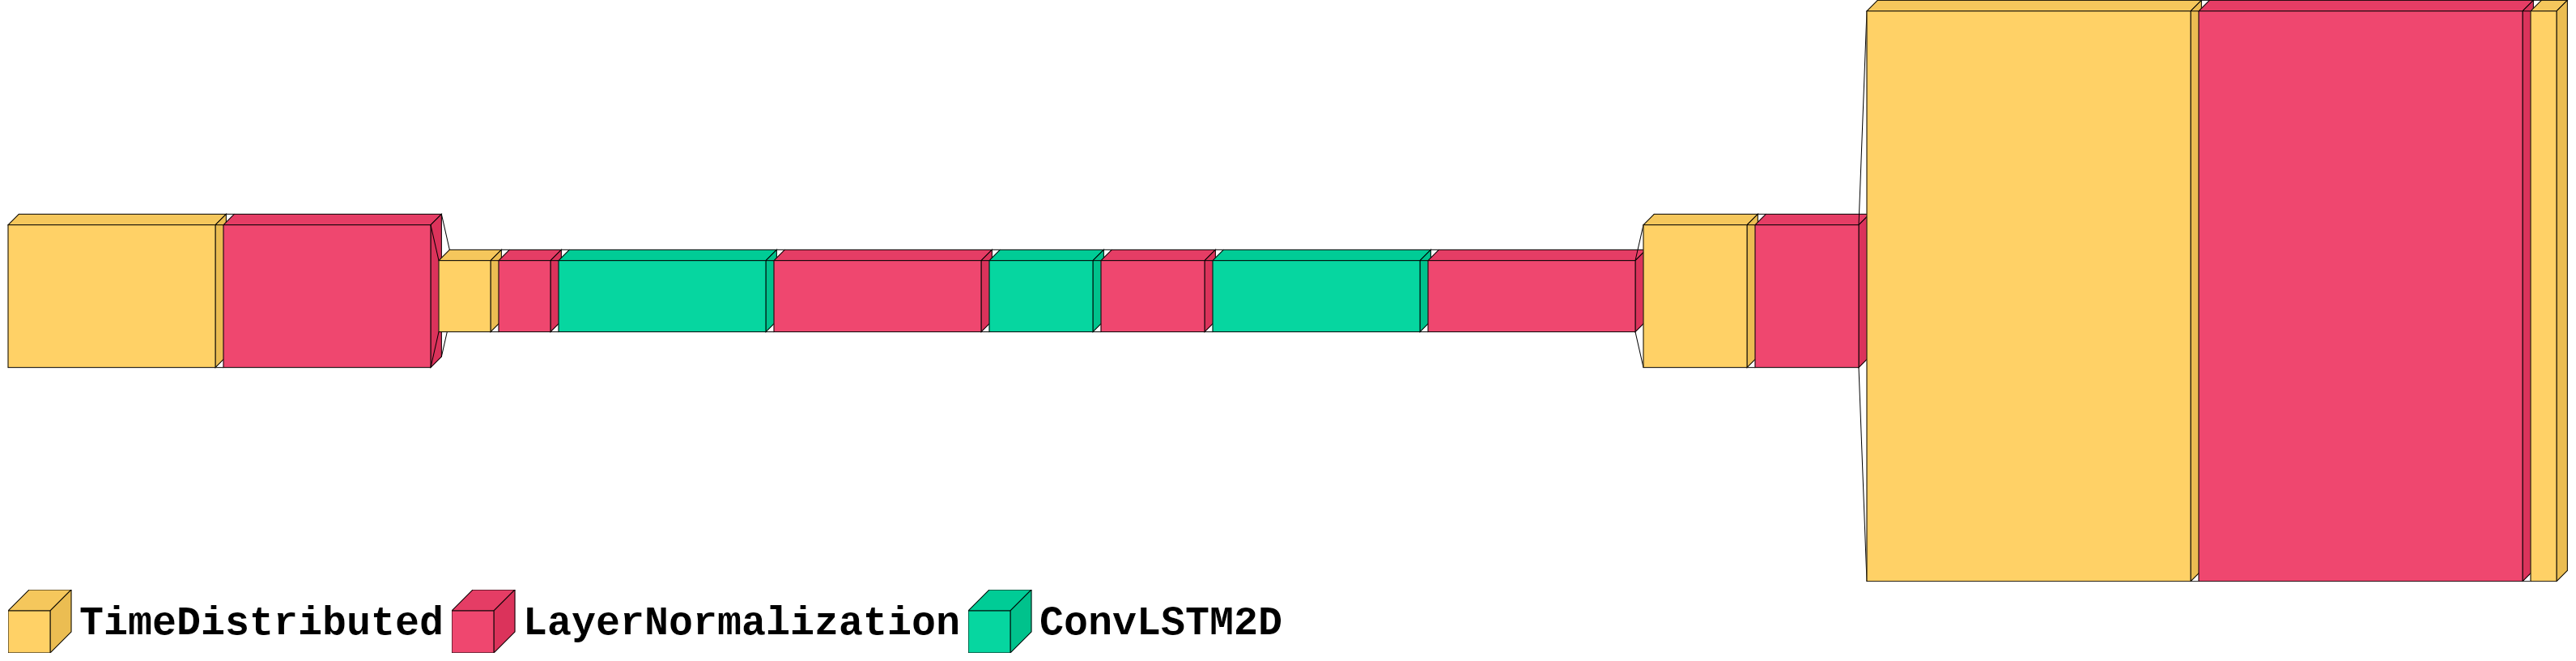

In [ ]:
import visualkeras
visualkeras.layered_view(model, legend=True)
from PIL import ImageFont
font = ImageFont.truetype("LiberationMono-Bold.ttf", 50)
visualkeras.layered_view(model, legend=True, font=font) # selected font

# Training

In [ ]:
import datetime

lodad_model = load_model('/content/drive/MyDrive/models/dataset-kfar-saba-east/model_2022-06-11 10:07:49.930177.h5')

for _ in range(10):
  date = datetime.datetime.now()
  date
  lodad_model.fit(training_set, validation_data=validation_set, epochs=5, shuffle=False)
  lodad_model.save(f'/content/drive/MyDrive/models/dataset-kfar-saba-east/model_{date}.h5')

Epoch 1/5
108/351 [========>.....................] - ETA: 4:28:09 - loss: 0.0013

# Evaluation

In [ ]:
def save_video_from_np(video, name, fps):
  out = cv2.VideoWriter(name, cv2.VideoWriter_fourcc(*'vp80'), fps, (320, 176), False) # here dimensions order needs to be opposite of our inputs, in our case 320x176, because layer output is 176x320
  for frame in video:
      frame_to_write = np.squeeze(np.uint8(frame * 255))

      #random_frame = np.random.randint(255, size=(176, 320)).astype('uint8')

      out.write(frame_to_write)
  out.release()

In [ ]:
def calculate_reconstruction_l2_cost(original_video, prediction_video):
  return np.linalg.norm(np.subtract(original_video, prediction_video))

In [ ]:
test_videos = test_set[0][0]
example_input_video = test_videos[0]
save_video_from_np(example_input_video, name = "./input.webm",  fps = 25 / 8.0)
display_video("./input.webm")

In [ ]:
from keras.models import load_model
#model = load_model('./model.h5')

test_videos = test_set[0][0]
predicted_videos = model.predict(test_videos)

for video_index in range(len(test_videos)):
  print(f"Reconstruction cost #{video_index}: {calculate_reconstruction_l2_cost(original_video = test_videos[video_index], prediction_video = predicted_videos[video_index])}")


predicted_video = predicted_videos[0]
save_video_from_np(predicted_video, name = "./output.webm",  fps = 25 / 8.0)
display_video("./output.webm")

Model performance on videos

In [ ]:
from keras.models import load_model
import matplotlib.pyplot as plt
import cv2
import numpy as np
from dataclasses import dataclass
import random


@dataclass
class Event:
    frame: int
    description: str



def load_single_test_video(path, custom_height=176, frames_to_skip=0):
    frames = []
    cap = cv2.VideoCapture(path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    if frames_to_skip == 0:
      video = np.empty((frame_count, custom_height, width, 1), np.dtype('double'))

      for frame_index in range(frame_count):
        _, frame = cap.read()
        video[frame_index] = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)[2:178,:][..., np.newaxis] / 255.0 # Added scaling of pixels to [0, 1] range

    else:
      frame_count_rounded = frame_count - (frame_count % (frames_to_skip + 1))
      number_of_frames_to_take = int(frame_count_rounded / (frames_to_skip + 1))

      video = np.empty((number_of_frames_to_take, custom_height, width, 1), np.dtype('double'))

      taken_frames_index = 0
      for frame_index in range(frame_count_rounded):
        _, frame = cap.read()
            # `[2:178,:]` is to make the frame height 176 because I need it to be divisible by 8
            # `[..., np.newaxis]` is to add more dimension for the grayscale channel (176 X 320 -> 176 X 320 X 1)

        if frame_index % (frames_to_skip + 1) == 0:
          video[taken_frames_index] = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)[2:178,:][..., np.newaxis] / 255.0 # Added scaling of pixels to [0, 1] range
          taken_frames_index += 1

    cap = cv2.VideoCapture(0) # Trying to release all memory for sure
    cap.release()

    return video


# Test_video should be in the correct width and height, and should be np.matrix of black and white pixels in range [0, 1]
def calculate_regularity_score(model, test_video, frames_in_clip=10, height=176, width=320, sequence_batch_size=100, events=[]):
  sz = test_video.shape[0] - frames_in_clip
  # sequences = np.zeros((sz, frames_in_clip, height, width, 1))

  # print(sequences.shape)
  # # apply the sliding window technique to get the sequences
  # for i in range(0, sz):
  #     clip = np.zeros((frames_in_clip, height, width, 1))
  #     for j in range(0, frames_in_clip):
  #         clip[j] = test_video[i + j, :, :, :]
  #     sequences[i] = clip

  # reconstructed_sequences = model.predict(sequences)
  # sequences_reconstruction_cost = np.array([np.linalg.norm(np.subtract(sequences[i], reconstructed_sequences[i])) for i in range(0, sz)])
  # sa = (sequences_reconstruction_cost - np.min(sequences_reconstruction_cost)) / np.max(sequences_reconstruction_cost)
  # sr = 1.0 - sa


  # apply the sliding window technique to get the sequences

  sequences = np.zeros((sequence_batch_size, frames_in_clip, height, width, 1))
  sequences_reconstruction_cost = []

  for i in range(0, sz):
      clip = np.zeros((frames_in_clip, height, width, 1))
      for j in range(0, frames_in_clip):
          clip[j] = test_video[i + j, :, :, :]

      current_sequence_index = i % sequence_batch_size
      sequences[current_sequence_index] = clip

      if current_sequence_index == sequence_batch_size - 1:
        sequence_predictions = model.predict(sequences)

        for predicted_index in range(len(sequence_predictions)):
          sequences_reconstruction_cost.append(calculate_reconstruction_l2_cost(sequences[predicted_index], sequence_predictions[predicted_index]))

  #print(f"(note: Last {sz % sequence_batch_size} frames did not fit in sequence batch size ({sequence_batch_size}) so they weren't processed)")


  sa = (sequences_reconstruction_cost - np.min(sequences_reconstruction_cost)) / np.max(sequences_reconstruction_cost)
  sr = 1.0 - sa



  '''avg_reconstruction_cost = sum(sequences_reconstruction_cost) / len(sequences_reconstruction_cost)
  print(f"Average reconstruction cost is: {avg_reconstruction_cost}")'''
  print(f"Average regularity score is: {sum(sr) / len(sr)}")


  plt.plot(sr)
  plt.ylabel('regularity score Sr(t)')
  plt.xlabel('frame t')
  #plt.show()

  # RC
  '''plt.plot(sequences_reconstruction_cost)
  plt.ylabel('Reconstruction Cost RC(t)')
  plt.xlabel('frame t')
  plt.show()'''

  # MINMAX RC
  '''avg = lambda x: sum(x) / len(x)
  minmax_rc = [avg(sequences_reconstruction_cost[i:i+20])-(10-i/20) for i in range(len(sequences_reconstruction_cost))]
  plt.plot(minmax_rc)
  plt.ylabel('Reconstruction Cost RC(t)')
  plt.xlabel('frame t')'''

  colors = 'yrg'
  for i, event in enumerate(events):
    plt.axvline(x = event.frame, color=colors[i%len(colors)], label = event.description)

  if events:
    # place legend outside
    plt.legend(bbox_to_anchor = (1.0, 1), loc = 'best')
  plt.show()
  return sr